<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : Ali Ansari, Bahar Dibaei Nia
### Student Number : 99105261, 99105442
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/ML Project'

/content/drive/My Drive/ML Project


In [3]:
%%capture
!pip install umap-learn

In [4]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,10)

In [5]:
data = pd.read_csv("METABRIC_RNA_Mutation.csv")

data = data.dropna()
y = data['overall_survival']

data = data.drop('overall_survival', axis=1)

# patient ID is not needed
clinical_data = data.iloc[:, 1:30]

gene_expressions = data.loc[:, ~data.columns.str.endswith("_mut")].iloc[:, 30:]

gene_mutations = data.filter(regex='_mut$')


In [6]:
clinical_data.head()
print(clinical_data.shape)

(1092, 29)


In [7]:
gene_expressions.head()
print(gene_expressions.shape)

(1092, 489)


In [8]:
gene_mutations.head()
print(gene_mutations.shape)

(1092, 173)


In [9]:
print(y.describe())
y.head(10)

count    1092.000000
mean        0.443223
std         0.496994
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: overall_survival, dtype: float64


1     1
4     0
5     0
8     0
9     0
10    0
19    1
22    1
30    0
31    1
Name: overall_survival, dtype: int64

## EDA

For each dataset, you must perform a sufficient EDA.

## Data Visualization

### Clinical Data EDA

In [10]:
print("Clinical dataset shape:", clinical_data.shape)
print("\nClinical dataset head:")
clinical_data.head()

Clinical dataset shape: (1092, 29)

Clinical dataset head:


,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,2.0,4.020,IDC,84.633333,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,2.0,6.080,MDLC,41.366667,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,Positive,...,4.0,4.062,IDC,7.800000,Positive,1,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
8,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,Positive,...,4.0,5.032,IDC,36.566667,Negative,1,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
9,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,Positive,...,5.0,3.056,ILC,36.266667,Negative,0,ER+/HER2- High Prolif,28.0,2.0,Died of Disease


In [11]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 1 to 1664
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1092 non-null   float64
 1   type_of_breast_surgery          1092 non-null   object 
 2   cancer_type                     1092 non-null   object 
 3   cancer_type_detailed            1092 non-null   object 
 4   cellularity                     1092 non-null   object 
 5   chemotherapy                    1092 non-null   int64  
 6   pam50_+_claudin-low_subtype     1092 non-null   object 
 7   cohort                          1092 non-null   float64
 8   er_status_measured_by_ihc       1092 non-null   object 
 9   er_status                       1092 non-null   object 
 10  neoplasm_histologic_grade       1092 non-null   float64
 11  her2_status_measured_by_snp6    1092 non-null   object 
 12  her2_status                     10

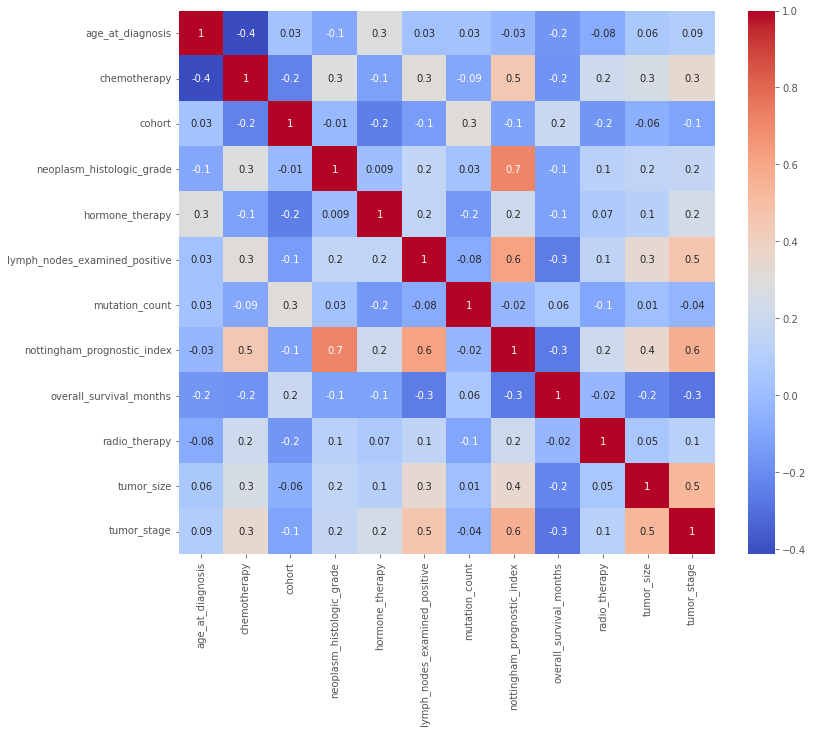

In [12]:
# First we get a heatmap of the correlations of the features
corr = clinical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".1g", cmap="coolwarm")
plt.show()

In [13]:
# Correlations of numerical features with target label
numerical_features = [col for col in clinical_data.columns 
                      if clinical_data[col].dtype == int or clinical_data[col].dtype == float]

for feature in numerical_features:
  print(f"Correlelation between {feature} and overall survival: {clinical_data[feature].corr(y)}")

Correlelation between age_at_diagnosis and overall survival: -0.30035848358240996
Correlelation between chemotherapy and overall survival: 0.040819394052220355
Correlelation between cohort and overall survival: -0.19461720673125601
Correlelation between neoplasm_histologic_grade and overall survival: -0.08071240814985484
Correlelation between hormone_therapy and overall survival: -0.02634786896977755
Correlelation between lymph_nodes_examined_positive and overall survival: -0.16540080684082065
Correlelation between mutation_count and overall survival: -0.12591379870575495
Correlelation between nottingham_prognostic_index and overall survival: -0.16894293789302064
Correlelation between overall_survival_months and overall survival: 0.42355731482822045
Correlelation between radio_therapy and overall survival: 0.11966325922430548
Correlelation between tumor_size and overall survival: -0.17882936431337565
Correlelation between tumor_stage and overall survival: -0.15481199160726175


Now we draw plots to somehow get a sense of joint distribution of each numerical feature and overall survival:

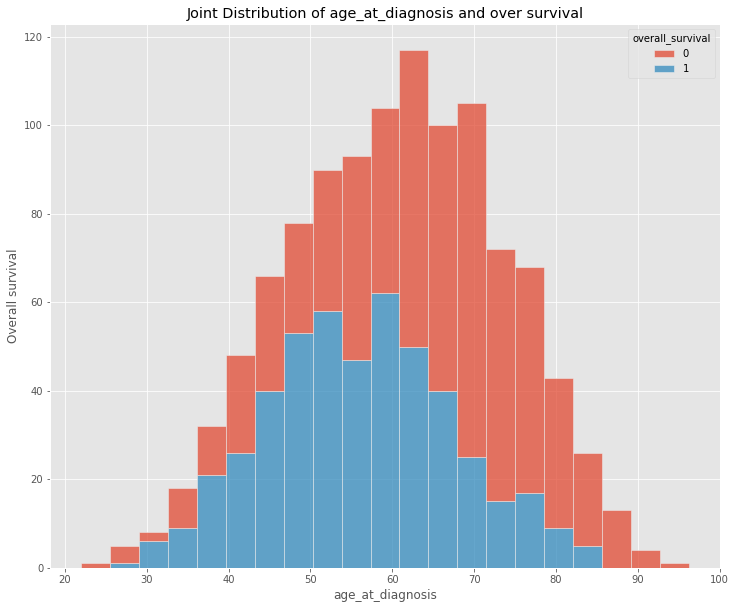

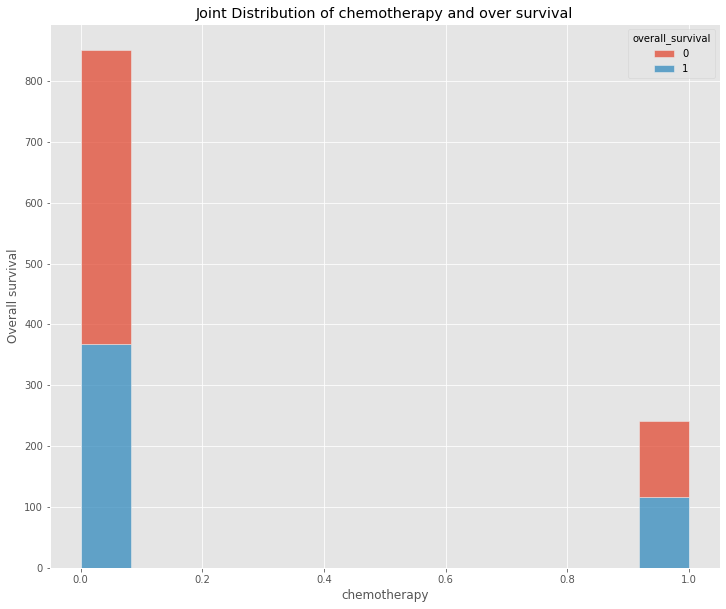

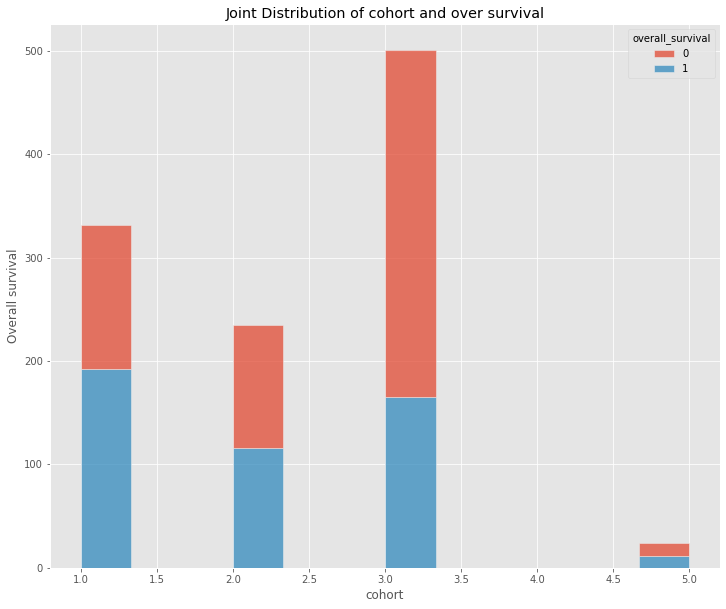

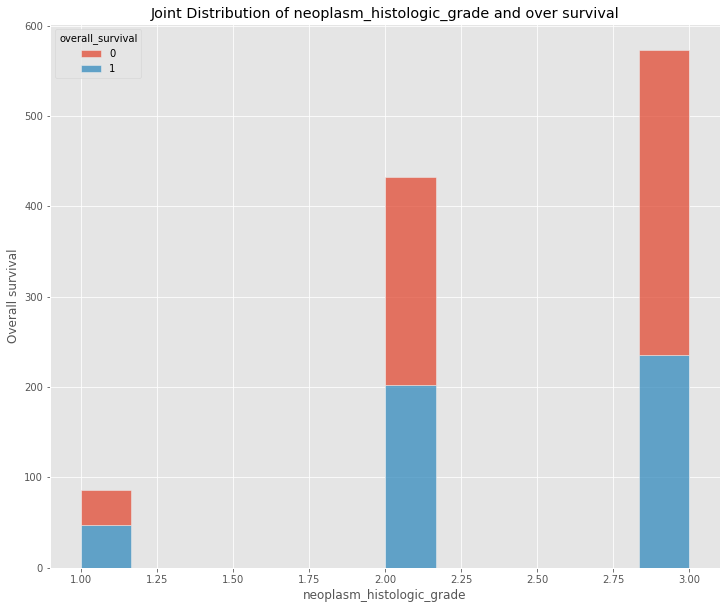

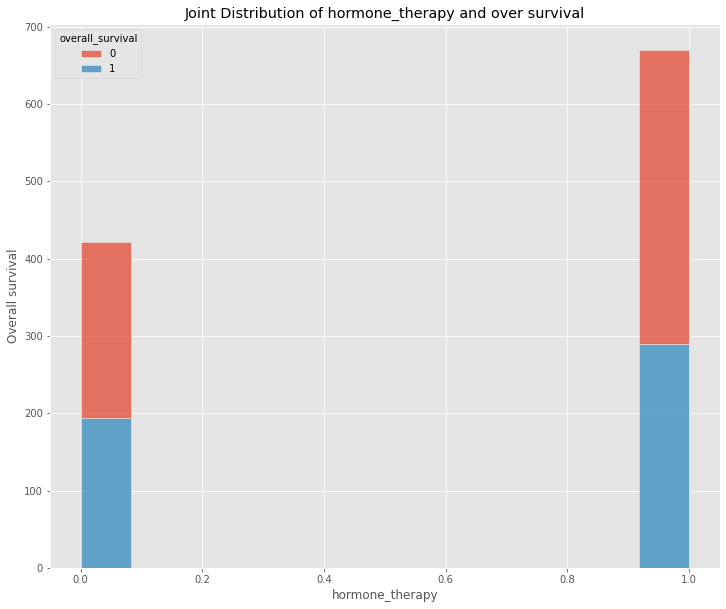

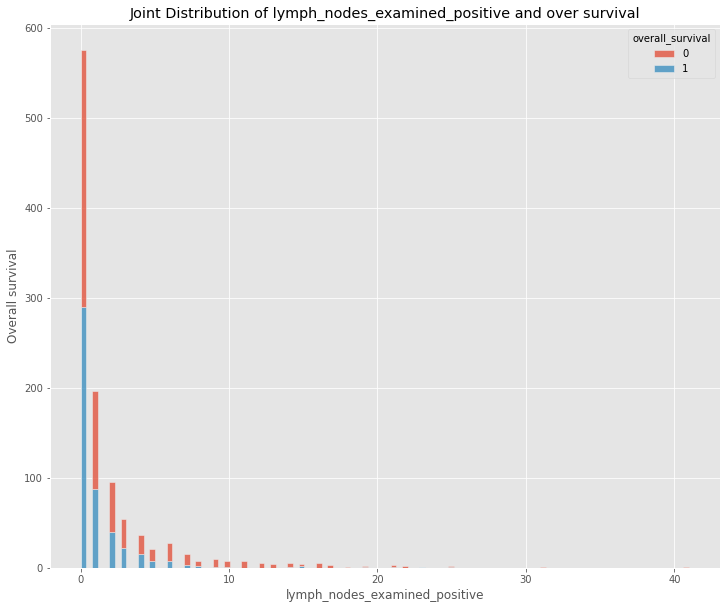

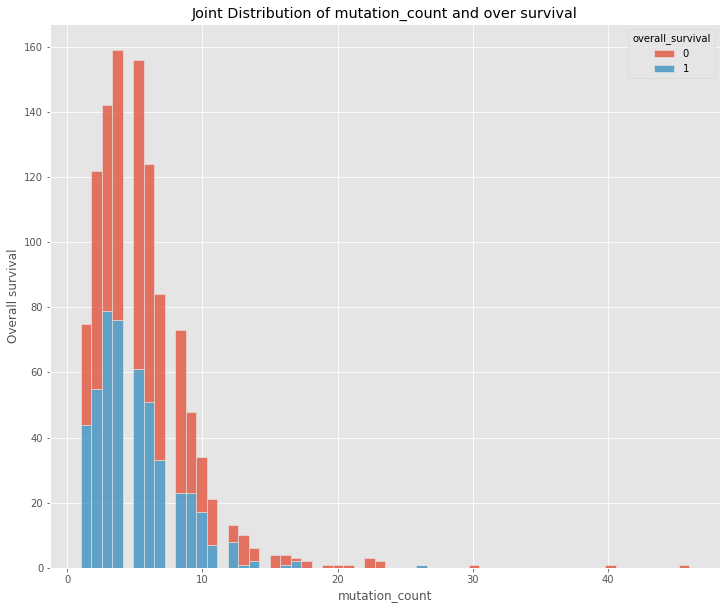

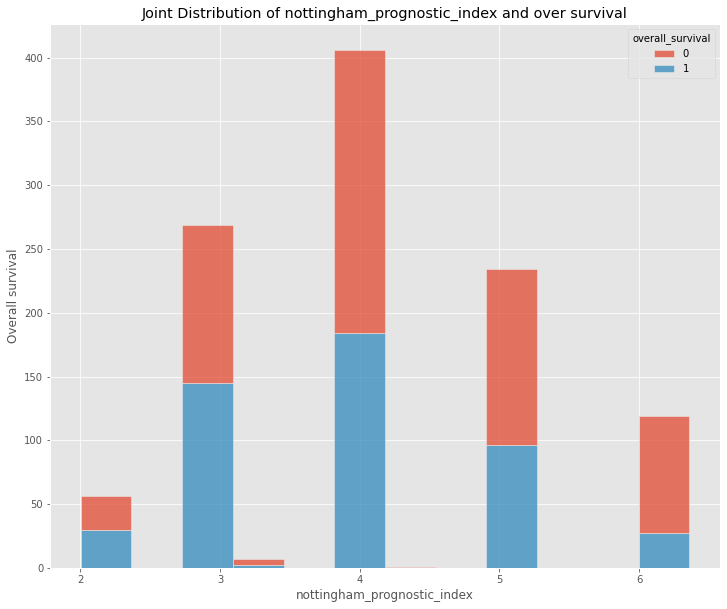

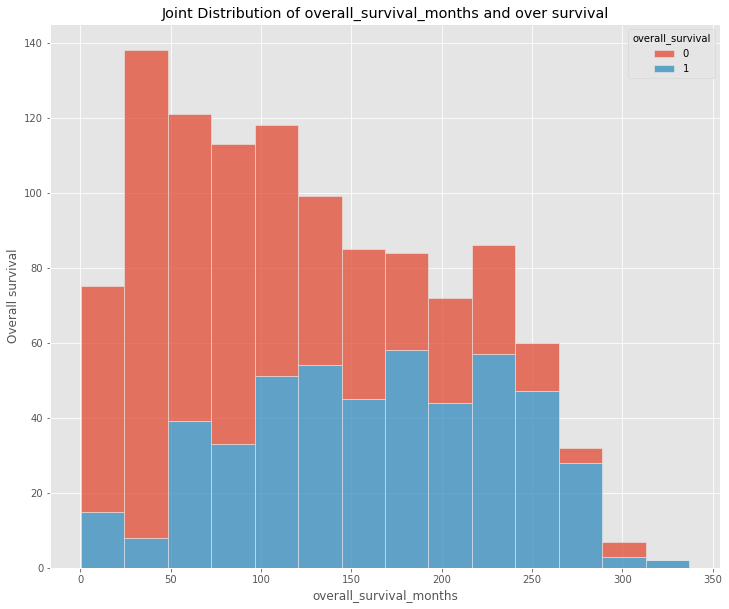

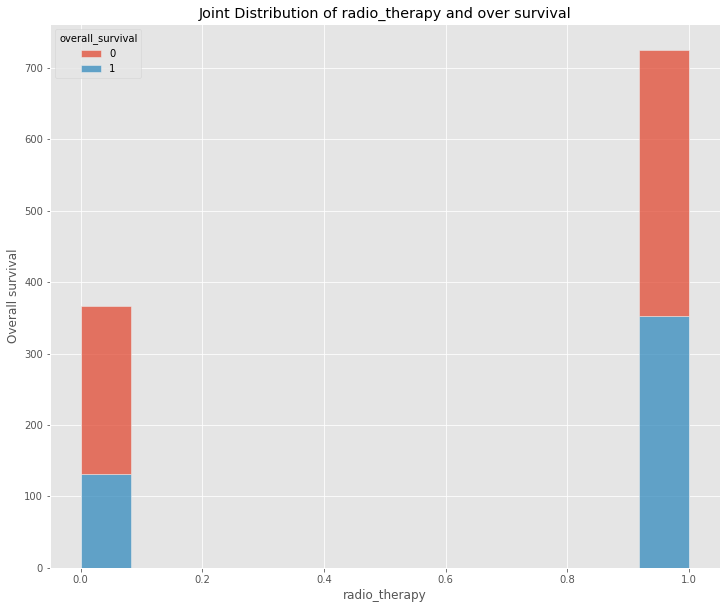

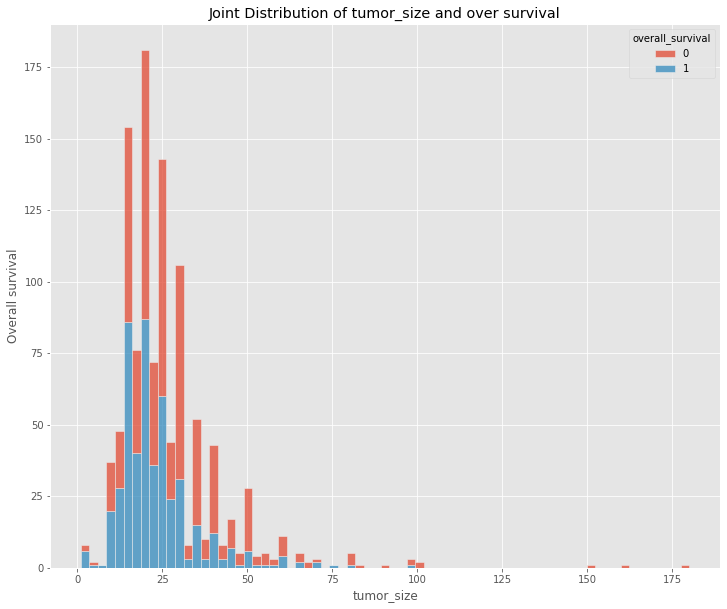

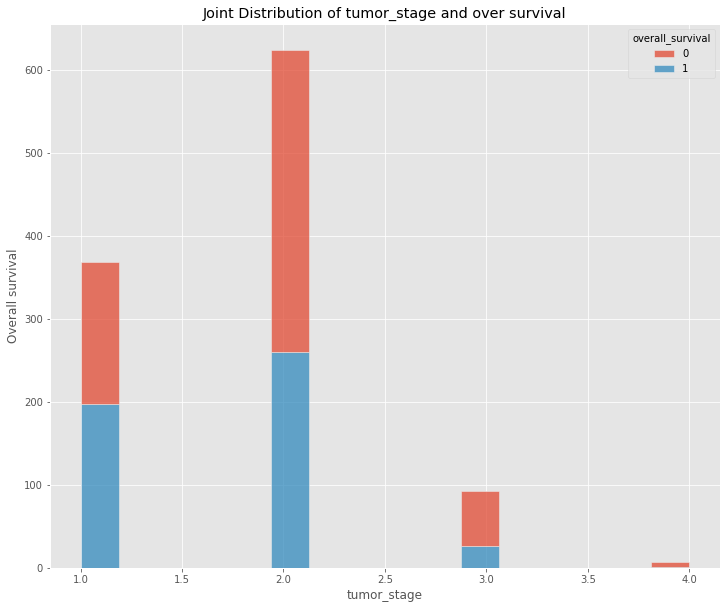

In [14]:
for feature in numerical_features:
  plt.figure()
  sns.histplot(x=clinical_data[feature], hue=y, multiple="stack")
  plt.title(f"Joint Distribution of {feature} and over survival")
  plt.xlabel(feature)
  plt.ylabel("Overall survival")

### Gene Expression EDA

In [15]:
print("\nGene expressions dataset shape:", gene_expressions.shape)
print("\nGene expressions dataset head:")
gene_expressions.head()


Gene expressions dataset shape: (1092, 489)

Gene expressions dataset head:


,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
5,-0.4341,0.6931,0.6909,1.0840,-1.9371,0.9252,1.1520,0.7951,-0.9677,-0.7750,...,-0.3910,0.0395,0.8191,0.1977,-0.2302,-0.5092,-0.3021,0.9357,-0.4217,0.5340
8,0.8347,-1.5038,0.3436,-0.5550,0.0558,-0.9155,-0.8571,-0.1267,-0.1705,0.6442,...,-0.3917,-0.1405,-0.9780,-0.3030,-0.1640,1.0783,1.8263,-0.5965,0.1502,-0.8837
9,-1.0087,-0.6074,0.0313,1.0975,0.5314,0.9105,-1.5068,-0.0196,0.3726,0.4892,...,-0.3020,-0.4788,3.6125,1.9925,0.2253,-0.8414,1.7093,-0.6921,0.6906,-0.8006


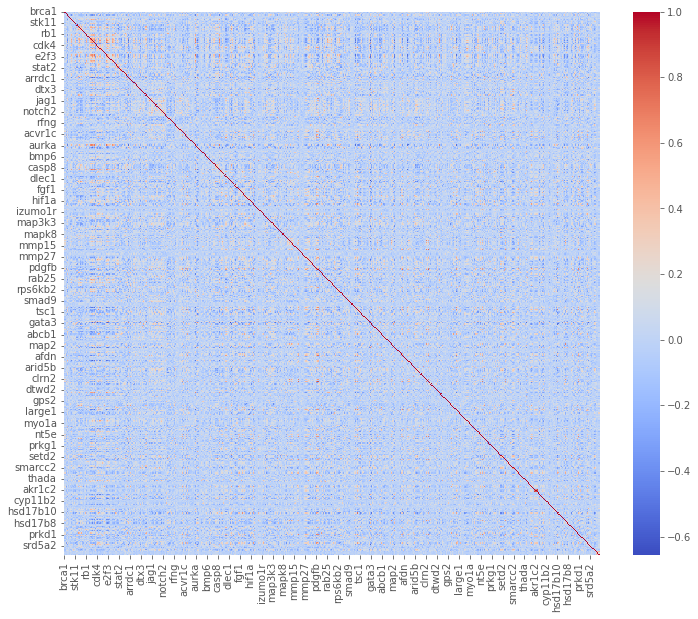

In [16]:
sns.heatmap(gene_expressions.corr(), cmap = 'coolwarm')

## Preprocessing (Encoding, Normalization, etc)

In [17]:
clinical_data.describe()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,radio_therapy,tumor_size,tumor_stage
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,60.393526,0.220696,2.220696,2.445971,0.613553,1.889194,5.471612,4.128973,126.545452,0.663919,26.025183,1.759158
std,13.000930,0.414906,0.955380,0.636365,0.487158,3.850981,3.812051,1.060455,77.134919,0.472583,15.012539,0.624623
min,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.002000,0.100000,0.000000,1.000000,1.000000
25%,50.787500,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.052000,60.825000,0.000000,17.000000,1.000000
50%,60.995000,0.000000,2.000000,3.000000,1.000000,0.000000,5.000000,4.046000,116.983333,1.000000,22.000000,2.000000
75%,69.705000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.046000,188.433333,1.000000,30.000000,2.000000
max,96.290000,1.000000,5.000000,3.000000,1.000000,41.000000,46.000000,6.360000,337.033333,1.000000,180.000000,4.000000


In [18]:
gene_expressions.describe()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,...,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,-0.028085,0.020667,0.009485,0.010304,-0.012711,0.005417,-0.019420,-0.023303,0.050874,-0.037458,...,0.024140,0.000135,-0.008970,-0.008196,-0.017698,-0.014025,0.015441,0.023104,-0.047584,0.023994
std,0.952387,0.973033,0.947266,0.971461,0.970862,0.985094,0.982306,0.975911,0.971457,0.946409,...,1.004061,0.983862,1.000690,0.907336,1.020073,0.871466,0.966939,0.991749,0.855541,1.028396
min,-2.351600,-2.558400,-3.215800,-5.262300,-2.421000,-3.170500,-3.122500,-2.688700,-3.321500,-2.870900,...,-1.950500,-2.754400,-1.894500,-3.945000,-2.704100,-2.776600,-3.609300,-1.166900,-2.112600,-1.051600
25%,-0.707625,-0.663725,-0.654700,-0.518925,-0.659500,-0.662725,-0.473475,-0.747650,-0.606650,-0.699050,...,-0.607575,-0.587200,-0.659800,-0.592500,-0.662950,-0.639475,-0.665925,-0.495475,-0.492675,-0.725650
50%,-0.137450,-0.026200,-0.012200,0.121100,-0.053900,0.007050,0.092750,-0.152700,0.028950,-0.094550,...,-0.231450,-0.040300,-0.154600,-0.030850,-0.077600,-0.022700,-0.010350,-0.269400,-0.153500,-0.422950
75%,0.516900,0.635400,0.631350,0.630850,0.612575,0.705975,0.577400,0.524575,0.688325,0.588725,...,0.350900,0.506325,0.480775,0.524450,0.548875,0.583500,0.578925,0.092950,0.242850,0.436625
max,4.554200,3.315600,3.772300,3.254100,3.912600,3.487300,2.283400,3.626900,5.371300,3.175900,...,5.554400,9.493500,5.833600,3.626800,12.742300,2.899400,3.442300,8.619900,9.379600,3.260800


In [19]:
for feature in numerical_features:
  clinical_data[feature] = (clinical_data[feature] - clinical_data[feature].mean()) / clinical_data[feature].std()


In [20]:
# Encode Categorical columns to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in range(len(clinical_data.columns)):
    if isinstance(clinical_data.iloc[1,i], str):
        clinical_data.iloc[:,i] = le.fit_transform(clinical_data.iloc[:,i])

# Dimension Reduction (20 + Up to 10 Points Optional)


For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

**As the number of features of clinical dataset is reasonable considering the number of samples, we didn't use dimensionallity reduction on this dataset.
On the other hand, it seems that we need to use a dimensionallity reduction approach for the gene expression dataset**

In [21]:
import umap
# to find the best dimensionality reduction method
umap = umap.UMAP(n_neighbors=20, n_components=2, random_state=42)
tsne = TSNE(n_components=2, learning_rate='auto',init='random')
pca = PCA()

umap_gene_expressions = umap.fit_transform(X=gene_expressions)

tsne_gene_expressions = tsne.fit_transform(X=gene_expressions)

pca_gene_expressions = pca.fit_transform(gene_expressions)

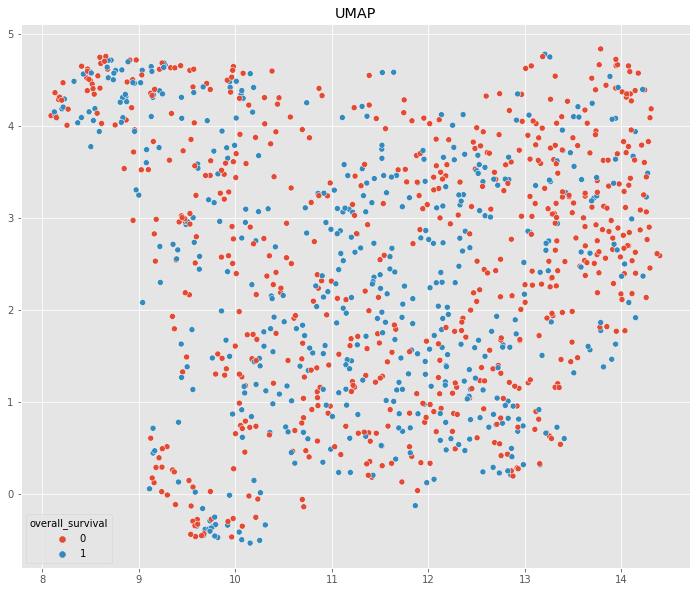

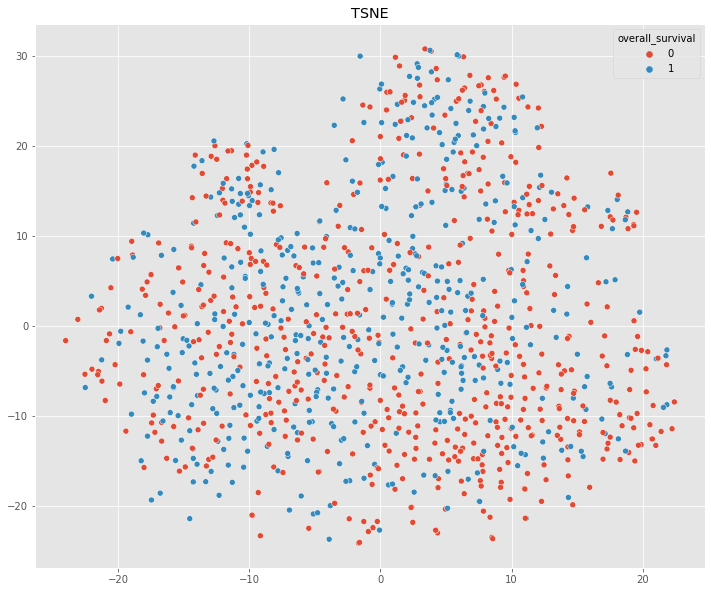

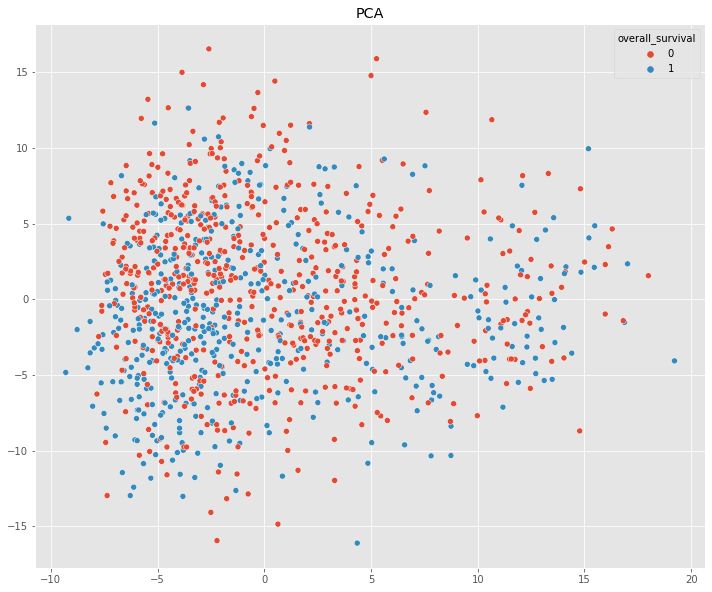

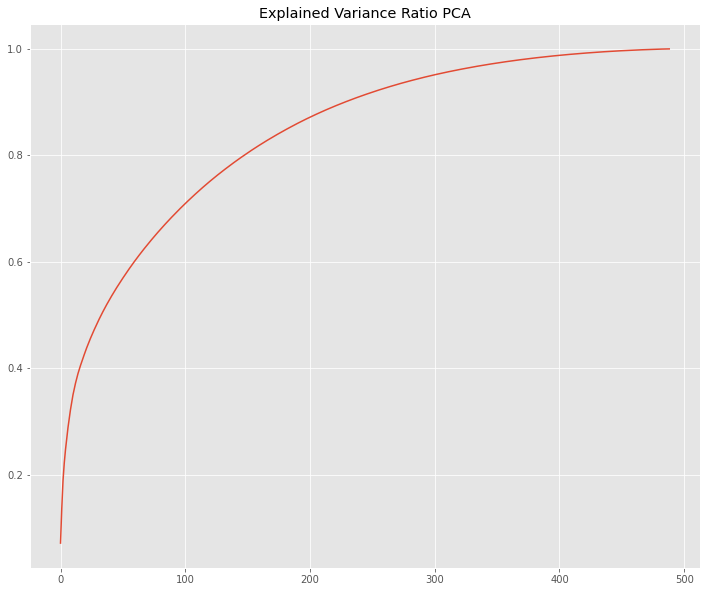

In [22]:
# first, we plot the samples in the first two dimensions of the reduced vesions

def plot_samples(samples, labels, title):
  sns.scatterplot(x=samples[:, 0], y=samples[:, 1], hue=labels)
  plt.title(title)
  plt.show()

plot_samples(umap_gene_expressions, y, "UMAP")
plot_samples(tsne_gene_expressions, y, "TSNE")
plot_samples(pca_gene_expressions, y, "PCA")

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance Ratio PCA")
plt.show()

We used UMAP as in ordre to preserver enough variance many components where required. Also TSNE is too slow. Also UMAP is the recommended approach :)

We perform splitting before dimensionality reduction as we do not want test set to have impact on training process.

In [23]:
# we must remove death from cancer column
if "death_from_cancer" in clinical_data.columns:
  clinical_data = clinical_data.drop("death_from_cancer", axis=1)

In [24]:
# Ratios: train-0.6 val-0.2 test-0.2 
X_gene_train, X_gene_test, y_gene_train, y_gene_test = train_test_split(gene_expressions, y, test_size=0.2, random_state=42)
X_gene_train, X_gene_val, y_gene_train, y_gene_val = train_test_split(X_gene_train, y_gene_train, test_size=0.25, random_state=42)

y_gene_train = y_gene_train.to_numpy()
y_gene_val = y_gene_val.to_numpy()
y_gene_test = y_gene_test.to_numpy()


X_cli_train, X_cli_test, y_cli_train, y_cli_test = train_test_split(clinical_data, y, test_size=0.2, random_state=42)
X_cli_train, X_cli_val, y_cli_train, y_cli_val = train_test_split(X_cli_train, y_cli_train, test_size=0.25, random_state=42)


y_cli_train = y_cli_train.to_numpy()
y_cli_val = y_cli_val.to_numpy()
y_cli_test = y_cli_test.to_numpy()

In [25]:
import umap

umap = umap.UMAP(n_components=30, n_neighbors=20, random_state=42)

X_reduced_gene_train = umap.fit_transform(X = X_gene_train)
X_reduced_gene_test = umap.transform(X = X_gene_test)
X_reduced_gene_val = umap.transform(X = X_gene_val)

In [26]:
X_reduced_gene_train.shape

(654, 30)

Although we have reduced the dimensions, we are going to find the most important features of the original gene expressions data

We are not going to use these features we have found here.

We use decision trees to find the most important features

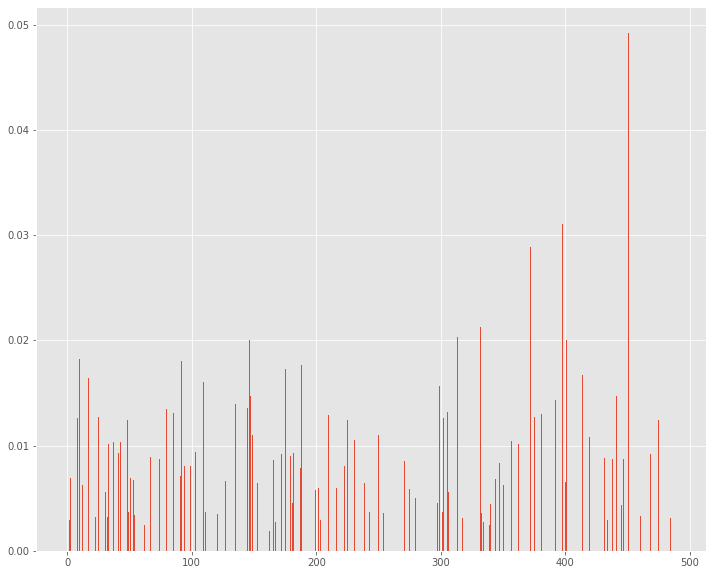

Top 10 most important featues:
hsd17b11
sbno1
ncoa3
col22a1
agtr2
cxcr1
setdb1
stk11
nrarp
map2k5


In [27]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

model = DecisionTreeClassifier()
model.fit(gene_expressions, y)
importance = model.feature_importances_

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

print("Top 10 most important featues:")
zipped_importances = [(importance[i], gene_expressions.columns[i]) for i in range(len(importance))]
most_important_features = list(reversed(sorted(zipped_importances)))[:10]

for _, feature in most_important_features:
  print(feature)

# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_accuracy(X, y, clf, dataset_name):
  y_pred = clf.predict(X)
  
  print(f"Accuracy on {dataset_name}:{accuracy_score(y, y_pred):.3f}")

def train_classic_model(X_train, X_val, y_train, y_val, dataset, classifier):
    classifier.fit(X_train, y_train)
    print_accuracy(X_train, y_train, classifier, f"{dataset} Train set")
    print_accuracy(X_val, y_val, classifier, f"{dataset} Validation set")

    return classifier

clf_gene_expression = train_classic_model(X_gene_train, X_gene_val, y_gene_train, y_gene_val, 'Gene Expression',
                                    RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42))

clf_reduced_gene_expression = train_classic_model(X_reduced_gene_train, X_reduced_gene_val, y_gene_train, y_gene_val, 'Reduced Gene Expression',
                                    LogisticRegression())

clf_clinical = train_classic_model(X_cli_train, X_cli_val, y_cli_train, y_cli_val, 'Clinical',
                             RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42))

Accuracy on Gene Expression Train set:1.000
Accuracy on Gene Expression Validation set:0.621
Accuracy on Reduced Gene Expression Train set:0.601
Accuracy on Reduced Gene Expression Validation set:0.621
Accuracy on Clinical Train set:1.000
Accuracy on Clinical Validation set:0.822


In [61]:
print_accuracy(X_gene_test, y_gene_test, clf_gene_expression, f"Gene Expression")
print_accuracy(X_reduced_gene_test, y_gene_test, clf_reduced_gene_expression, f"Reduced Gene Expression")
print_accuracy(X_cli_test, y_cli_test, clf_clinical, f"Clinical")

Accuracy on Gene Expression:0.667
Accuracy on Reduced Gene Expression:0.635
Accuracy on Clinical:0.790


# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [30]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.functional as F
from tqdm import tqdm
from torch.optim import SGD

## Dataset Definition

In [31]:
class DataFrameDataset(Dataset):
  def __init__(self, features, targets):
    self.features = features
    self.targets = targets

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, idx):
    if type(self.features) != np.ndarray:
      data = torch.tensor(self.features.iloc[idx].values)
    else:
      data = torch.tensor(self.features[idx, :])
    
    label = self.targets[idx].astype(float)
    return data, label

## Training Loop and Test and Plotting

In [44]:
from tqdm import tqdm
import copy

def test(model, dataloader):
  model.eval()

  criterion = nn.BCELoss()

  total_corrects = 0
  total_loss = 0
  for data, target in dataloader:
    data = data.to(torch.float32)
    target = target.to(torch.float32).reshape(-1, 1)

    output = model(data)
    loss = criterion(output, target)

    total_loss += loss.item()
    total_corrects += sum(output.round() == target)

  return total_loss/len(dataloader.dataset), (total_corrects/len(dataloader.dataset))[0]
  

def train(model, trainloader, valloader, n_epochs, learning_rate=0.01):

  criterion = nn.BCELoss()
  optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=1e-4)

  history = {
      'train_loss': [],
      'train_acc': [],
      'val_loss': [],
      'val_acc': []
  }
  pbar = tqdm(range(n_epochs), desc="Epochs", leave=True)
  
  best_val_acc = 0.0
  best_model_weights = None
  
  for epoch in pbar:
    model.train()

    total_corrects = 0
    total_loss = 0
    for data, target in trainloader:
      data = data.to(torch.float32)
      target = target.to(torch.float32).reshape(-1, 1)

      output = model(data)
      loss = criterion(output, target)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss += loss.item()
      
      total_corrects += sum(output.round() == target)

    history['train_loss'].append(total_loss/len(trainloader.dataset))
    history['train_acc'].append((total_corrects/len(trainloader.dataset))[0])
    val_loss, val_acc = test(model, valloader)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    pbar.set_description(f"Epoch {epoch + 1}, Train Loss: {history['train_loss'][-1]:.3f}, Train Accuracy: {history['train_acc'][-1]:.3f} , Validation Loss: {history['val_loss'][-1]:.3f}, Validation Accuracy: {history['val_acc'][-1]:.3f}")

    if val_acc > best_val_acc:
      best_val_acc = val_acc
      best_model_weights = copy.deepcopy(model.state_dict())

  model.load_state_dict(best_model_weights)
  
  return history


def plot(history):
  plt.plot(history['train_loss'], label="Train Loss")
  plt.plot(history['val_loss'], label="Validation Loss")
  plt.legend()
  plt.show()

  plt.plot(history['train_acc'], label="Train Accuracy")
  plt.plot(history['val_acc'], label="Validation Accuracy")
  plt.legend()
  plt.show()

## Model Definition

In [33]:
class Net(nn.Module):

  def __init__(self, input_size, hidden_layers, use_dropout=False):
    super(Net, self).__init__()
    hidden_layers = [input_size] + hidden_layers + [1]
    components = []
    for i in range(len(hidden_layers) - 1):
      if use_dropout:
        components.append(
            [nn.Linear(hidden_layers[i], hidden_layers[i+1]), nn.BatchNorm1d(hidden_layers[i+1]) , nn.Dropout(0.5), nn.ReLU()]
        )
      else:
        components.append(
            [nn.Linear(hidden_layers[i], hidden_layers[i+1]), nn.BatchNorm1d(hidden_layers[i+1]), nn.ReLU()]
        )

    layers = []
    for component in components:
      layers += component
    self.layers = nn.Sequential(*layers)

  def forward(self, x):
    return torch.sigmoid(self.layers(x))

## DataLoaders

In [34]:
batch_size = 32

cli_trainloader = DataLoader(DataFrameDataset(X_cli_train, y_cli_train), batch_size)
cli_valloader = DataLoader(DataFrameDataset(X_cli_val, y_cli_val), batch_size)
cli_testloader = DataLoader(DataFrameDataset(X_cli_test, y_cli_test), batch_size)

gene_trainloader = DataLoader(DataFrameDataset(X_gene_train, y_gene_train), batch_size)
gene_valloader = DataLoader(DataFrameDataset(X_gene_val, y_gene_val), batch_size)
gene_testloader = DataLoader(DataFrameDataset(X_gene_test, y_gene_test), batch_size)

reduced_gene_trainloader = DataLoader(DataFrameDataset(X_reduced_gene_train, y_gene_train), batch_size)
reduced_gene_valloader = DataLoader(DataFrameDataset(X_reduced_gene_val, y_gene_val), batch_size)
reduced_gene_testloader = DataLoader(DataFrameDataset(X_reduced_gene_test, y_gene_test), batch_size)


## Clinical Dataset

Epoch 500, Train Loss: 0.014, Train Accuracy: 0.916 , Validation Loss: 0.024, Validation Accuracy: 0.699: 100%|██████████| 500/500 [01:51<00:00,  4.47it/s]


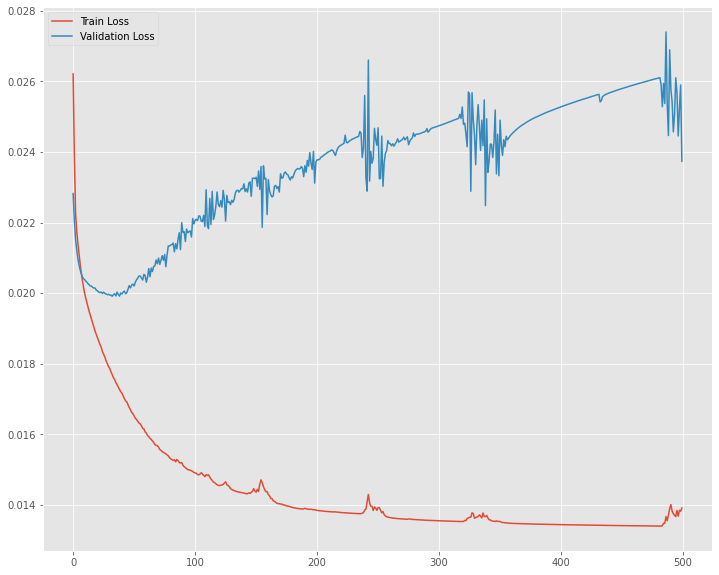

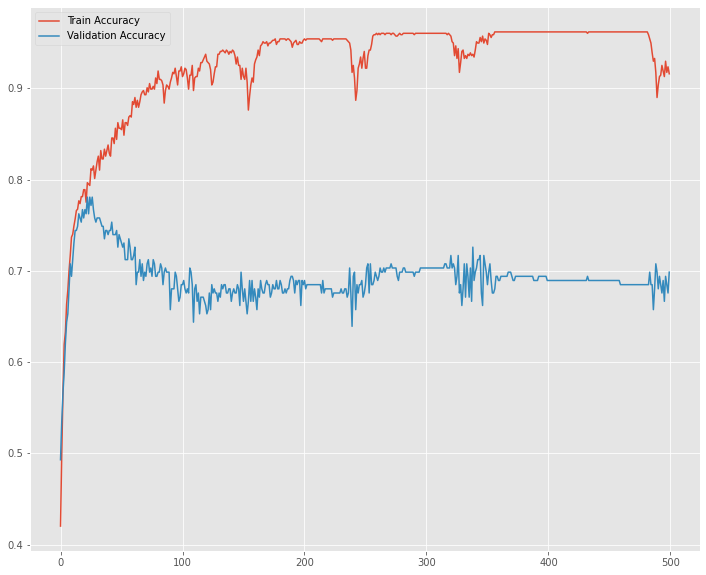

Accuracy on Clinical Test set: 0.717


In [35]:
clinical_model = Net(X_cli_train.shape[1], [50, 20])

clinical_train_history = train(clinical_model, cli_trainloader, cli_valloader, 500, 0.001)
plot(clinical_train_history)

_, clinical_test_acc = test(clinical_model, cli_testloader)
print(f'Accuracy on Clinical Test set: {clinical_test_acc:.3f}')

## Gene Expression Dataset

Epoch 500, Train Loss: 0.018, Train Accuracy: 0.754 , Validation Loss: 0.024, Validation Accuracy: 0.594: 100%|██████████| 500/500 [01:50<00:00,  4.51it/s]


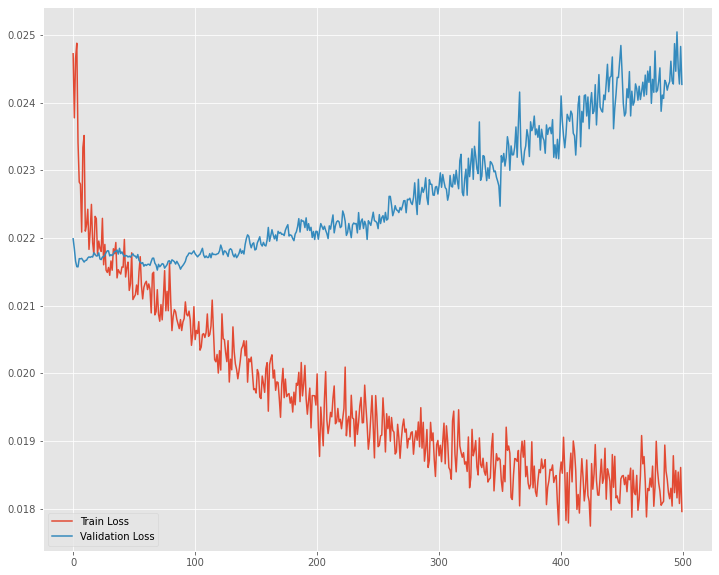

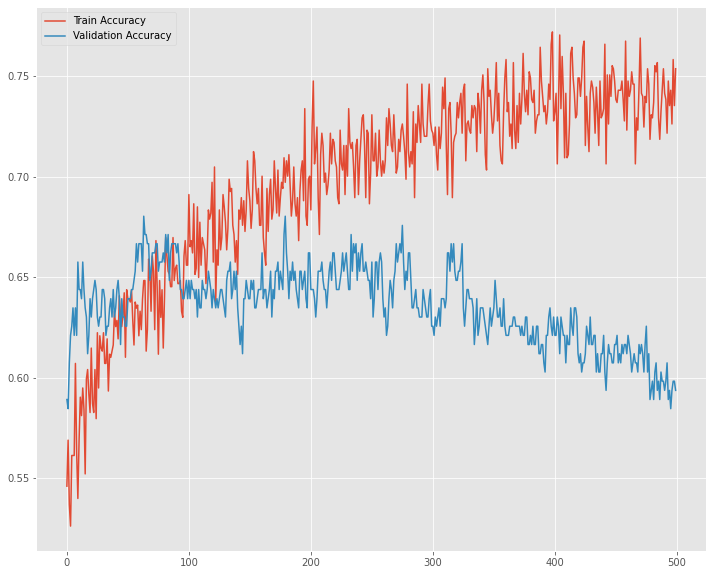

Accuracy on Gene Expression Test set: 0.644


In [62]:
gene_model = Net(X_gene_train.shape[1], [32, 16], use_dropout=True)

gene_train_history = train(gene_model, gene_trainloader, gene_valloader, 500, 0.001)
plot(gene_train_history)

_, gene_test_acc = test(gene_model, gene_testloader)
print(f'Accuracy on Gene Expression Test set: {gene_test_acc:.3f}')

## Reduced Gene Expression Dataset

Epoch 300, Train Loss: 0.022, Train Accuracy: 0.563 , Validation Loss: 0.022, Validation Accuracy: 0.607: 100%|██████████| 300/300 [00:21<00:00, 13.73it/s]


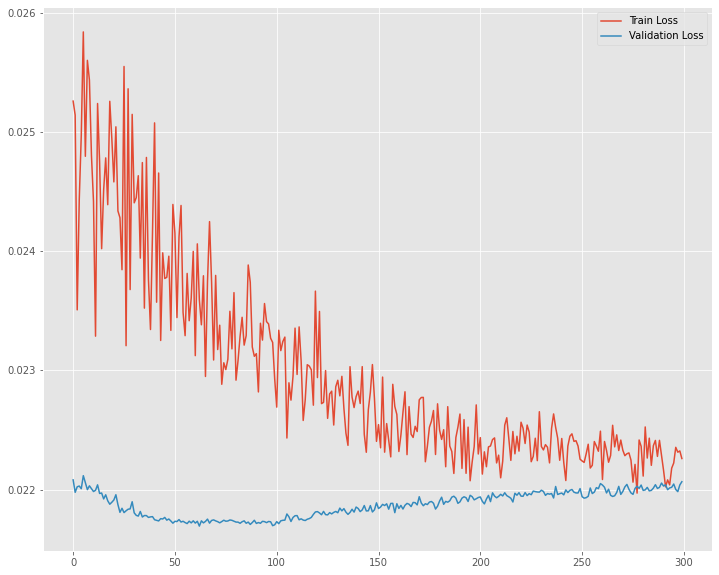

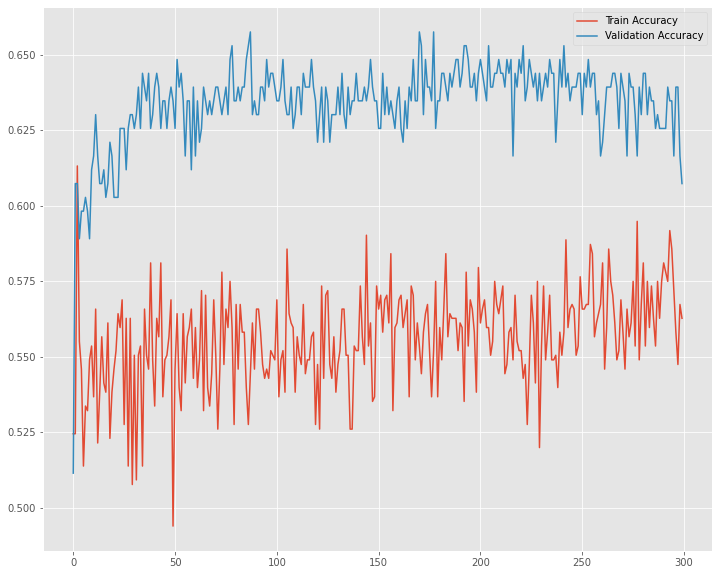

Accuracy on Reduced Gene Expression Test set: 0.630


In [55]:
reduced_gene_model = Net(X_reduced_gene_train.shape[1], [32, 32], use_dropout=True)
2
reduced_gene_train_history = train(reduced_gene_model, reduced_gene_trainloader, reduced_gene_valloader, 300, 0.0001)
plot(reduced_gene_train_history)

_, reduced_gene_test_acc = test(reduced_gene_model, reduced_gene_testloader)
print(f'Accuracy on Reduced Gene Expression Test set: {reduced_gene_test_acc:.3f}')

# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

**As we can see, the overall results on Clinical dataset seems to be much better than genetic datasets. One reason for that is because of the nature of the clinical features. Any symptoms or other kind of clinical data is caused by changes in the expressions of genes. In other words, we can say that the clinical dataset is kind of processed version of gene expression dataset.**

**To compare Gene Expression dataset and its reduced version, we can see that the results both in classic models and Neural Network is better when the data is not reduced. This may not be reasonable as we expect to have better performance on reduced version.**

**To compare the models, we can see that overall, classic models have better performance than neural networks (except for original gene expressions dataset) on these datasets. One main reason for this is that the sizes of the datasets are too small for the networks to perform a good classification on the datasets. In other words, data samples are too few to have good performance on Neural Networks. In these cases, classic models are good choices.**

**Neural Networks show better performance on Gene Expressions dataset because the features in this dataset are too many and it requires to learn a complex function on features to have a good classification result.**